# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [ ]:
import torch
import numpy as np

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [ ]:
zeros = torch.zeros(4,8)
ones = torch.ones(1,8)
figures = torch.cat((torch.linspace(4, 2, steps=3), 
                    torch.linspace(6, 5, steps=2),
                    torch.linspace(2, 4, steps=3)),0).view(1,8)

In [ ]:
res = torch.cat([figures*-1, ones*-1, zeros, ones, figures])
print(res)

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])


1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [ ]:
even = torch.arange(2, 21, 2)
odd = even + 1

res_m = torch.multiply(even, odd)
res_m 

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [ ]:
torch.arange(1, 111).view(11,10)[:, 0:7]

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [ ]:
def ex_4(m,n):
  pattern = torch.reshape(torch.arange(4), (2, 2))
  return pattern.repeat(m, n)[:m, :n]

In [ ]:
ex_4(4, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

v_1

In [ ]:
t = 20 * torch.rand(4, 7)

In [ ]:
t2 = torch.div(torch.sub(t, t.min()), t.max()-t.min())

In [ ]:
t, t2, t.max(), t.min()

(tensor([[16.2042, 15.6247,  5.7931, 12.0172,  8.3232,  1.4505,  1.4038],
         [16.8731,  8.4499, 18.5888, 13.8731, 18.6783, 13.5563, 19.5038],
         [17.0975,  6.2782, 10.1436,  9.2234,  7.4553, 12.6305,  2.1182],
         [ 0.6295,  7.7455, 19.2854, 19.3391,  6.6802, 18.4363,  2.9010]]),
 tensor([[0.8252, 0.7945, 0.2736, 0.6033, 0.4076, 0.0435, 0.0410],
         [0.8606, 0.4143, 0.9515, 0.7017, 0.9563, 0.6849, 1.0000],
         [0.8725, 0.2993, 0.5041, 0.4553, 0.3616, 0.6358, 0.0789],
         [0.0000, 0.3770, 0.9884, 0.9913, 0.3206, 0.9434, 0.1204]]),
 tensor(19.5038),
 tensor(0.6295))

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [ ]:
ar1 = torch.randint(0, 10, (4,7))
ar2 = torch.randint(0, 10, (4,7))

In [ ]:
display(ar1)
display(ar2)

tensor([[1, 1, 9, 2, 4, 0, 9],
        [7, 9, 5, 2, 3, 8, 4],
        [7, 4, 8, 2, 4, 1, 7],
        [2, 0, 8, 1, 5, 9, 9]])

tensor([[9, 3, 1, 0, 3, 3, 9],
        [4, 8, 3, 7, 0, 5, 0],
        [3, 0, 7, 3, 7, 2, 2],
        [4, 4, 8, 5, 3, 8, 2]])

v_1

In [ ]:
torch.where(ar1 > ar2, ar1, ar2)

tensor([[9, 3, 9, 2, 4, 3, 9],
        [7, 9, 5, 7, 3, 8, 4],
        [7, 4, 8, 3, 7, 2, 7],
        [4, 4, 8, 5, 5, 9, 9]])

v_2

In [ ]:
torch.fmax(ar1, ar2)

tensor([[9, 3, 9, 2, 4, 3, 9],
        [7, 9, 5, 7, 3, 8, 4],
        [7, 4, 8, 3, 7, 2, 7],
        [4, 4, 8, 5, 5, 9, 9]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

это второе среди наибольших??

In [ ]:
tensor_7 = torch.randint(0, 100, (20,))
tensor_7

tensor([16, 96,  7, 32, 65, 43, 92, 58, 58, 83, 13, 92, 40, 52, 85, 15, 16, 53,
        62, 27])

In [ ]:
max_idx = torch.argmax(tensor_7)
print(f'first max index: {max_idx}, number: {tensor_7[max_idx]}')
tensor_7[max_idx] = -1
max_idx = torch.argmax(tensor_7)
print(f'second max index: {max_idx}, number: {tensor_7[max_idx]}')

first max index: 1, number: 96
second max index: 6, number: 92


In [ ]:
max_idx

tensor(6)

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [ ]:
arr2_1 = torch.arange(1, 8)
arr2_2 = torch.arange(1, 110, 10).view(11,1)
display(arr2_1)
display(arr2_2)

tensor([1, 2, 3, 4, 5, 6, 7])

tensor([[  1],
        [ 11],
        [ 21],
        [ 31],
        [ 41],
        [ 51],
        [ 61],
        [ 71],
        [ 81],
        [ 91],
        [101]])

In [ ]:
arr2_1 * arr2_2

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  22,  33,  44,  55,  66,  77],
        [ 21,  42,  63,  84, 105, 126, 147],
        [ 31,  62,  93, 124, 155, 186, 217],
        [ 41,  82, 123, 164, 205, 246, 287],
        [ 51, 102, 153, 204, 255, 306, 357],
        [ 61, 122, 183, 244, 305, 366, 427],
        [ 71, 142, 213, 284, 355, 426, 497],
        [ 81, 162, 243, 324, 405, 486, 567],
        [ 91, 182, 273, 364, 455, 546, 637],
        [101, 202, 303, 404, 505, 606, 707]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [ ]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])

a_2d_new = torch.transpose(a_2d, 0, 1)

In [ ]:
a_2d_new - b_1d

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [ ]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])

torch.argwhere(a == b).view(4)

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [ ]:
t_1_3_2 = torch.arange(9).view(3,3)
torch.flip(t_1_3_2, [0, 1])

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

v_1

In [ ]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
mask1 = torch.ge(a, 5) 
mask2 = torch.le(a, 10) 
torch.masked_select(a, mask1 & mask2)

tensor([ 6,  9, 10])

v_2

In [ ]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
torch.masked_select(a, (a>=5) & (a<=10))

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3,3)`

In [ ]:
t_1_3_4 = torch.arange(9).reshape(3,3)
t_1_3_4

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
idx = torch.LongTensor([1, 0, 2])
t_1_3_4[:, idx]

tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
t_1_3_5 = torch.randint(0, 10, (8,10))
t_1_3_5

tensor([[7, 9, 3, 5, 5, 8, 8, 8, 0, 6],
        [3, 7, 3, 6, 4, 4, 6, 0, 0, 2],
        [8, 1, 3, 1, 8, 3, 6, 9, 5, 5],
        [8, 1, 3, 1, 9, 5, 8, 8, 9, 5],
        [3, 0, 1, 3, 5, 3, 0, 4, 0, 7],
        [2, 2, 5, 6, 1, 4, 0, 9, 6, 0],
        [3, 3, 0, 6, 5, 7, 6, 8, 2, 5],
        [3, 5, 1, 9, 7, 5, 7, 1, 4, 3]])

In [ ]:
min_idx = torch.sum(t_1_3_5, 1).argmin()
print(f'{min_idx} => {t_1_3_5[min_idx]}')

4 => tensor([3, 0, 1, 3, 5, 3, 0, 4, 0, 7])


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

v_1

In [ ]:
t_1_3_6 = torch.randint(0, 100, (20,))
t_1_3_6

tensor([70, 67,  4, 21, 66, 69, 19, 36, 32, 88, 94, 17,  3, 86, 57, 50, 70, 33,
        89, 43])

In [ ]:
t_1_3_6_new = torch.where(t_1_3_6 < 30, 30, t_1_3_6)
t_1_3_6_new  = torch.where(t_1_3_6_new > 70, 70, t_1_3_6_new)
t_1_3_6_new 

tensor([70, 67, 30, 30, 66, 69, 30, 36, 32, 70, 70, 30, 30, 70, 57, 50, 70, 33,
        70, 43])

v_2

In [ ]:
t_1_3_6

tensor([70, 67,  4, 21, 66, 69, 19, 36, 32, 88, 94, 17,  3, 86, 57, 50, 70, 33,
        89, 43])

In [ ]:
torch.clamp(t_1_3_6, min=30, max=70)

tensor([70, 67, 30, 30, 66, 69, 30, 36, 32, 70, 70, 30, 30, 70, 57, 50, 70, 33,
        70, 43])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [ ]:
t_1_3_7_one = torch.randint(0, 10, (30, 3))
t_1_3_7_two = torch.randint(0, 10, (30, 3))

In [ ]:
torch.where(t_1_3_7_one < t_1_3_7_two, 0, t_1_3_7_one).sum()

tensor(318)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [ ]:
t_1_3_8 = torch.randint(0, 10, (20, 20))
t_1_3_8

tensor([[5, 8, 3, 3, 3, 3, 4, 3, 5, 5, 8, 5, 6, 4, 6, 7, 3, 4, 4, 9],
        [4, 4, 2, 5, 2, 1, 0, 8, 6, 1, 6, 3, 8, 7, 3, 2, 2, 7, 0, 2],
        [1, 5, 9, 9, 6, 9, 6, 4, 4, 7, 5, 6, 1, 4, 1, 5, 9, 2, 1, 9],
        [3, 3, 8, 7, 8, 3, 3, 0, 3, 9, 7, 5, 3, 3, 7, 2, 1, 2, 4, 3],
        [1, 7, 1, 7, 9, 8, 4, 5, 7, 2, 7, 0, 6, 9, 6, 9, 5, 5, 2, 0],
        [8, 9, 5, 2, 9, 0, 9, 6, 2, 7, 3, 9, 4, 8, 7, 9, 2, 3, 1, 2],
        [4, 0, 6, 2, 1, 1, 9, 0, 1, 3, 2, 7, 0, 3, 5, 2, 4, 1, 0, 7],
        [7, 2, 9, 8, 0, 0, 6, 5, 1, 4, 4, 0, 7, 9, 5, 8, 9, 6, 6, 2],
        [2, 6, 9, 6, 0, 4, 9, 0, 5, 0, 9, 8, 7, 2, 6, 0, 9, 8, 1, 5],
        [3, 7, 8, 7, 2, 3, 3, 8, 3, 4, 2, 7, 2, 0, 3, 4, 5, 4, 3, 9],
        [2, 3, 3, 6, 6, 4, 5, 4, 6, 0, 7, 0, 2, 0, 0, 7, 8, 6, 2, 7],
        [7, 3, 5, 9, 5, 0, 5, 5, 6, 9, 3, 1, 5, 2, 4, 1, 9, 8, 2, 5],
        [3, 9, 6, 4, 8, 3, 5, 1, 1, 5, 1, 6, 1, 9, 4, 2, 2, 6, 4, 1],
        [0, 1, 3, 5, 6, 7, 9, 4, 6, 9, 4, 9, 1, 1, 5, 8, 0, 7, 9, 7],
        [8, 6, 3, 0,

In [ ]:
needed_eye = torch.cat((torch.zeros(20).view(20,1), torch.eye(20)[:, :-1]),1) == 1
t_1_3_8[needed_eye]

tensor([8, 2, 9, 8, 8, 9, 0, 1, 0, 2, 0, 5, 9, 5, 7, 2, 5, 3, 0])

In [ ]:
# БЕЗ ПРИХОТЛИВОГО ИНДЕКСИРОВАНИЯ
torch.diag(t_1_3_8, diagonal=1)

tensor([8, 2, 9, 8, 8, 9, 0, 1, 0, 2, 0, 5, 9, 5, 7, 2, 5, 3, 0])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [ ]:
ar1 = torch.randint(0, 10, (5, 10))
ar2 = torch.randint(0, 10, (5, 10))
display(ar1)
display(ar2)

tensor([[8, 3, 1, 9, 4, 8, 4, 5, 0, 2],
        [1, 7, 8, 7, 4, 0, 1, 9, 2, 1],
        [5, 5, 6, 4, 1, 8, 8, 4, 8, 7],
        [6, 2, 0, 0, 4, 5, 5, 5, 5, 4],
        [9, 8, 8, 4, 2, 3, 4, 5, 3, 0]])

tensor([[5, 0, 4, 7, 1, 6, 9, 7, 8, 2],
        [8, 0, 7, 6, 6, 7, 8, 5, 9, 2],
        [8, 1, 5, 1, 6, 0, 8, 5, 2, 5],
        [2, 4, 2, 2, 2, 9, 3, 6, 8, 6],
        [3, 5, 4, 0, 6, 4, 2, 5, 5, 2]])

In [ ]:
torch.where(ar1 == ar2, torch.pow(ar1, 2), ar1)

tensor([[ 8,  3,  1,  9,  4,  8,  4,  5,  0,  4],
        [ 1,  7,  8,  7,  4,  0,  1,  9,  2,  1],
        [ 5,  5,  6,  4,  1,  8, 64,  4,  8,  7],
        [ 6,  2,  0,  0,  4,  5,  5,  5,  5,  4],
        [ 9,  8,  8,  4,  2,  3,  4, 25,  3,  0]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [ ]:
ar1 = torch.randint(0, 10, (4, 7))
ar2 = torch.randint(0, 10, (4, 7))
ar3 = torch.randint(0, 10, (4, 7))

print(ar1)
print(ar2)
print(ar3)
print()

torch.where((ar1 > ar2)&(ar1 < ar3), 0, ar1)

tensor([[9, 9, 0, 5, 3, 5, 8],
        [5, 7, 0, 7, 7, 0, 3],
        [7, 4, 2, 6, 6, 9, 9],
        [9, 0, 0, 5, 5, 3, 8]])
tensor([[2, 3, 8, 9, 1, 2, 9],
        [6, 6, 3, 2, 0, 8, 3],
        [1, 4, 6, 9, 8, 0, 7],
        [4, 2, 4, 1, 1, 9, 8]])
tensor([[1, 3, 7, 6, 5, 8, 0],
        [8, 4, 8, 1, 8, 1, 8],
        [1, 2, 1, 2, 5, 2, 1],
        [3, 6, 1, 3, 5, 9, 7]])



tensor([[9, 9, 0, 5, 0, 0, 8],
        [5, 7, 0, 7, 0, 0, 3],
        [7, 4, 2, 6, 6, 9, 9],
        [9, 0, 0, 5, 5, 3, 8]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [ ]:
ar1 = torch.randint(0, 20, (20, 5))
print(ar1,'\n')
ar1_indices = torch.max(ar1, dim=1).indices

k, v = torch.unique(ar1_indices, return_counts=True)

values = dict(zip(k.tolist(), v.tolist()))
print("столбцы (не менее 5 раз встречается значение):", end=' ')
print([k for k, v in values.items() if v >= 5])

tensor([[ 6, 15,  2,  3,  0],
        [ 1,  3,  9, 10,  1],
        [17,  5, 14, 11,  0],
        [ 1, 19, 15, 16, 19],
        [ 1, 18,  8, 11,  1],
        [ 9, 16, 14, 10,  7],
        [19, 12, 17, 13,  6],
        [10, 10, 19,  7, 15],
        [ 7, 17,  9,  2, 11],
        [14,  3,  8, 16, 15],
        [ 8, 18,  3, 17,  7],
        [ 3,  3, 17, 14,  9],
        [ 8, 11,  7, 16, 19],
        [18, 15, 19, 14,  4],
        [ 6,  4, 18, 19, 13],
        [14, 16, 10, 17,  1],
        [11,  0, 12,  5,  3],
        [12, 12,  7, 12, 15],
        [13, 15, 11, 18, 10],
        [15, 11,  1,  2, 13]]) 

столбцы (не менее 5 раз встречается значение): [1, 3]


1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [ ]:
ar1 = torch.rand((4, 7))
ar1

tensor([[0.6989, 0.5377, 0.9001, 0.8258, 0.5817, 0.8354, 0.9102],
        [0.4574, 0.5923, 0.5797, 0.9183, 0.7555, 0.7886, 0.0714],
        [0.8621, 0.3846, 0.9869, 0.1918, 0.7029, 0.1242, 0.7009],
        [0.3374, 0.4373, 0.0172, 0.1809, 0.8629, 0.1897, 0.4019]])

In [ ]:
max_el = ar1.max()
idx_1_3_12 = (ar1 == max_el).nonzero()[0]
ar1[idx_1_3_12[0]:,idx_1_3_12[1]:] = 0
ar1[idx_1_3_12[0], idx_1_3_12[1]] = max_el

In [ ]:
max_el, ar1

(tensor(0.9869),
 tensor([[0.6989, 0.5377, 0.9001, 0.8258, 0.5817, 0.8354, 0.9102],
         [0.4574, 0.5923, 0.5797, 0.9183, 0.7555, 0.7886, 0.0714],
         [0.8621, 0.3846, 0.9869, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.3374, 0.4373, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]))

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [ ]:
def one_hot_encoding(input_tensor):
  columns = input_tensor.max() 
  rows = input_tensor.size()
  result = torch.zeros(rows[0], columns)
  indices_ = torch.cat((torch.arange(0, rows[0]).unsqueeze(-1), 
                        (input_tensor-1).unsqueeze(-1)),-1)
  value = torch.ones(indices_.shape[0])
  result.index_put_(tuple(indices_.t()), value)
  return result

In [ ]:
tensor = torch.tensor([2, 3, 2, 2, 2, 1])
one_hot_encoding(tensor)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

Я предлагаю вывести сразу несколько самых частоповторяющихся значений - принцип наподобие моды

In [ ]:
def freq(arr):
  vals, freq = torch.unique(arr, return_counts=True)
  freq_idxs = (freq == freq.max()).nonzero().squeeze()
  res = vals[freq_idxs].tolist() 
  vals_idxs = []
  if isinstance(res, int):
    res = [res]
  for i in res:
    vals_idxs.append((arr==i).nonzero().squeeze().tolist())
  print(f'{len(res)} max value(s) => {res} (indices => {vals_idxs})')

In [ ]:
arr = torch.randint(0, 100, (20, ))
display(arr)
freq(arr)

tensor([70, 98, 91, 25, 79, 68, 76, 47, 13, 83, 82, 44, 82, 20, 68, 38, 73, 88,
        17, 34])

2 max value(s) => [68, 82] (indices => [[5, 14], [10, 12]])


для трех частоповторяющихся значений

In [ ]:
arr_exp = torch.tensor([52, 40, 12,  9,  1, 76, 23,  9, 62, 75,  
                 1, 59, 58, 66, 79, 46, 18, 22, 46, 47])
freq(arr_exp)

3 max value(s) => [1, 9, 46] (indices => [[4, 10], [3, 7], [15, 18]])


## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [ ]:
x = torch.linspace(0,10, steps=300)
y = x * torch.sin(x)
x[y > 0.5]

tensor([0.7692, 0.8027, 0.8361, 0.8696, 0.9030, 0.9365, 0.9699, 1.0033, 1.0368,
        1.0702, 1.1037, 1.1371, 1.1706, 1.2040, 1.2375, 1.2709, 1.3043, 1.3378,
        1.3712, 1.4047, 1.4381, 1.4716, 1.5050, 1.5385, 1.5719, 1.6054, 1.6388,
        1.6722, 1.7057, 1.7391, 1.7726, 1.8060, 1.8395, 1.8729, 1.9064, 1.9398,
        1.9732, 2.0067, 2.0401, 2.0736, 2.1070, 2.1405, 2.1739, 2.2074, 2.2408,
        2.2742, 2.3077, 2.3411, 2.3746, 2.4080, 2.4415, 2.4749, 2.5084, 2.5418,
        2.5753, 2.6087, 2.6421, 2.6756, 2.7090, 2.7425, 2.7759, 2.8094, 2.8428,
        2.8763, 2.9097, 2.9431, 6.3880, 6.4214, 6.4548, 6.4883, 6.5217, 6.5552,
        6.5886, 6.6221, 6.6555, 6.6890, 6.7224, 6.7559, 6.7893, 6.8227, 6.8562,
        6.8896, 6.9231, 6.9565, 6.9900, 7.0234, 7.0569, 7.0903, 7.1237, 7.1572,
        7.1906, 7.2241, 7.2575, 7.2910, 7.3244, 7.3579, 7.3913, 7.4247, 7.4582,
        7.4916, 7.5251, 7.5585, 7.5920, 7.6254, 7.6589, 7.6923, 7.7258, 7.7592,
        7.7926, 7.8261, 7.8595, 7.8930, 

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [ ]:
arr_1_4_2 = torch.arange(2, 100)
for i in arr_1_4_2:
  if i != 0:
    arr_1_4_2 = torch.where((arr_1_4_2 % i == 0) & (torch.gt(arr_1_4_2, i)), 0, arr_1_4_2)
print(arr_1_4_2[arr_1_4_2 != 0])

tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])


1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [ ]:
tensor_1 = torch.randint(0, 100, (20, 2))
tensor_2 = torch.randint(0, 100, (20, 2))

dist = np.sqrt(torch.square(torch.sub(tensor_1, tensor_2)).sum())
dist.item()

265.2998303806469

ДЛЯ ПРОВЕРКИ | NUMPY

In [ ]:
tensor_1_np = tensor_1.numpy()
tensor_2_np = tensor_2.numpy()
np.linalg.norm(tensor_1_np - tensor_2_np)

265.2998303806469

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [ ]:
arr_1_4_4 = torch.randint(0, 100, (20, 3))
arr_1_4_4

tensor([[74, 36, 98],
        [49, 77,  6],
        [97, 54, 64],
        [ 6, 12, 25],
        [76,  7, 91],
        [70, 54, 24],
        [12, 19, 78],
        [44, 78, 16],
        [46, 45, 19],
        [59, 25,  9],
        [ 5, 28, 41],
        [50,  0, 65],
        [63, 92, 82],
        [49, 28, 83],
        [79, 34, 74],
        [55,  0, 22],
        [22, 54, 10],
        [33, 19, 50],
        [45, 39, 11],
        [80, 79, 54]])

ПРЯМОЙ ПОРЯДОК

In [ ]:
magnitude = ((arr_1_4_4.square()).sum(1)).sqrt()
r, indices = torch.sort(magnitude)
arr_1_4_4[indices]

tensor([[ 6, 12, 25],
        [ 5, 28, 41],
        [22, 54, 10],
        [55,  0, 22],
        [45, 39, 11],
        [33, 19, 50],
        [59, 25,  9],
        [46, 45, 19],
        [12, 19, 78],
        [50,  0, 65],
        [44, 78, 16],
        [49, 77,  6],
        [70, 54, 24],
        [49, 28, 83],
        [79, 34, 74],
        [76,  7, 91],
        [80, 79, 54],
        [74, 36, 98],
        [97, 54, 64],
        [63, 92, 82]])

ОБРАТНЫЙ ПОРЯДОК

In [ ]:
magnitude = ((arr_1_4_4.square()).sum(1)).sqrt()
r, indices = torch.sort(magnitude, descending=True)
arr_1_4_4[indices]

tensor([[63, 92, 82],
        [97, 54, 64],
        [74, 36, 98],
        [80, 79, 54],
        [76,  7, 91],
        [79, 34, 74],
        [49, 28, 83],
        [70, 54, 24],
        [49, 77,  6],
        [44, 78, 16],
        [50,  0, 65],
        [12, 19, 78],
        [46, 45, 19],
        [59, 25,  9],
        [33, 19, 50],
        [45, 39, 11],
        [55,  0, 22],
        [22, 54, 10],
        [ 5, 28, 41],
        [ 6, 12, 25]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [ ]:
arr_1_4_4 = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])

for i, v in enumerate(arr_1_4_4):
  if i == len(arr_1_4_4)-1:
    if v > arr_1_4_4[i-1]:
      print(i, end=', ')
  elif i == 0:
    if v > arr_1_4_4[i+1]:
      print(i, end=', ')
  else:
    if v > arr_1_4_4[i-1] and v > arr_1_4_4[i+1]:
      print(i, end=', ')

2, 5, 7, 

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [ ]:
def find_nearest(arr, n):
  idx = (torch.abs(arr - n)).argmin()
  return arr[idx], idx

arr_1_4_6 = torch.rand(100)
number_ = 0.4
print(f'{number_} => {arr_1_4_6}')
res, res_idx = find_nearest(arr_1_4_6, number_)
print(f'{res} (индекс: {res_idx})')

0.4 => tensor([9.9135e-01, 9.5110e-01, 6.8328e-01, 2.4667e-01, 6.5209e-01, 4.2462e-01,
        4.2897e-01, 5.1760e-01, 8.2946e-01, 2.2984e-01, 3.9972e-01, 6.4674e-01,
        1.7750e-01, 1.3252e-01, 5.8923e-01, 8.7358e-01, 3.3669e-01, 4.1965e-01,
        1.8374e-01, 3.4373e-02, 5.8937e-01, 7.2363e-02, 9.7906e-01, 9.3618e-01,
        2.5686e-01, 9.7016e-01, 6.7982e-01, 5.9248e-01, 7.3664e-01, 5.1115e-01,
        4.9710e-01, 2.5333e-01, 3.2485e-01, 7.3711e-01, 6.9263e-02, 7.1168e-01,
        1.1549e-02, 1.6189e-01, 4.4895e-02, 1.6370e-01, 2.9712e-01, 6.0848e-01,
        6.8652e-01, 1.6558e-01, 2.6574e-01, 1.7806e-01, 8.5541e-01, 5.3993e-01,
        9.2475e-01, 1.7957e-01, 5.3708e-01, 1.4185e-01, 9.5648e-01, 8.5850e-01,
        9.6289e-01, 4.7277e-01, 4.1314e-01, 7.6459e-01, 5.3270e-01, 6.9165e-01,
        2.7944e-01, 6.3543e-02, 3.5726e-01, 9.3121e-01, 8.4508e-01, 9.9583e-01,
        3.4005e-01, 1.7982e-01, 4.1427e-01, 8.6969e-01, 3.9240e-02, 4.1087e-01,
        3.4598e-01, 4.0098e-01, 7

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

X = A ^(-1) * -C * B^(-1)

In [ ]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]).float()
B = torch.tensor([[3, -1], [2, 1]]).float()
C = torch.tensor([[7, 21], [11, 8], [8, 4]]).float()

A_inv = torch.linalg.inv(A)
B_inv = torch.linalg.inv(B)
neg_C = torch.mul(C, -1)

X = torch.mm(torch.mm(A_inv, neg_C), B_inv)
X

tensor([[ 1.0000e+00, -1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [ ]:
res_dict = {0: "Вектора линейно зависимы", 1: "Вектора линейно независимы"}
a1 = [3., -3, 0, 7]
a2 = [2, 2, 4, 7]
a3 = [1, 2, 3, 4]
a4 = [5, -4, 1, 3]

res = torch.tensor([a1, a2, a3, a4])
print(res.det())
res_dict[int(res.det().round().tolist())]

tensor(2.4385e-05)


'Вектора линейно зависимы'

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [ ]:
arr_1_4_9 = torch.empty(20000).normal_(0, 10)
hist_tensor, bin_edges = torch.histogram(arr_1_4_9, bins=30)
hist_tensor

tensor([7.0000e+00, 1.9000e+01, 2.4000e+01, 6.3000e+01, 1.1700e+02, 2.6000e+02,
        4.5600e+02, 7.0800e+02, 1.1410e+03, 1.4650e+03, 1.8720e+03, 2.0980e+03,
        2.3060e+03, 2.2570e+03, 2.0190e+03, 1.6950e+03, 1.2850e+03, 9.0600e+02,
        5.6800e+02, 3.6400e+02, 1.9900e+02, 8.8000e+01, 4.0000e+01, 2.5000e+01,
        1.0000e+01, 4.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00])

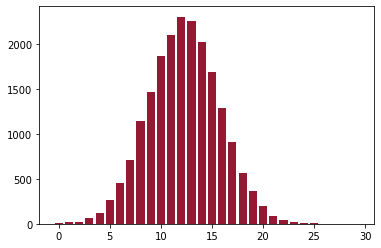

In [ ]:
import matplotlib.pyplot as plt
  
x = range(30)
plt.bar(x, hist_tensor, align='center', color=['#931a32'])
plt.show()